# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
#Импортируем необходимые библиотеки, откроем файл и посмотрим первые 10 строк
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv')
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


In [2]:
#Откроем файл снова, поставив разделитель для строк, посмотрим первые 10
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#Выведем всю информацию о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В файле стоит разделитель строк '\t', во многих столбцах есть пропущенные значения, многие из которых сложно чем-то заполнить, поэтому можно их оставить пустыми, а остальные заполнить для дальнейших расчётов и графиков.

## Предобработка данных

Определим и изучим пропущенные значения:

In [4]:
#Высоту потолков можно взять по медиане и заполнить этим значением все пропуски
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [5]:
#По этому столбцу очень мало заполненных строк, скорее всего этот столбец типа bool добавили недавно, поэтому его 
#можно заполнить значением False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [6]:
#Пустые строки в столбце балкона можно заполнить 0, поскольку скорее всего это означает, что балконы не нужны + переведём 
#сразу в тип int
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [7]:
#Для удобства переведём общую цену тоже в int
df['last_price'] = df['last_price'].astype('int')

In [8]:
#Перевёдём столбец с датой в соответствующий формат
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [9]:
#Проверим, есть ли дублирующиеся строки
df.duplicated().sum()

0

In [10]:
#Пустые строки с жилой площадью можно заполнить с помощью среднего процента от всех жилых площадей к общей, округлив его до
#1 знака после запятой, посчитаем этот процент
living_area_percent = round(((df['living_area'] * 100) / df['total_area']).mean(), 1)
living_area_percent

56.5

In [11]:
#То же самое проделаем и для кухни
kitchen_area_percent = round(((df['kitchen_area'] * 100) / df['total_area']).mean(), 1)
kitchen_area_percent

18.7

In [12]:
#Теперь заполним пустые строки жилой площади, умножив всю площадь на этот процент
df['living_area'] = df['living_area'].fillna((df['total_area'] * living_area_percent) / 100)

In [13]:
#То же самое проделаем и для кухни
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area'] * kitchen_area_percent) / 100)

In [14]:
#Теперь проверим все значения для столбцов на их 'корректность', начнём с числа фотографий квартиры
df['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [15]:
#Цена
df['last_price'].sort_values()

8793         12190
17456       430000
14911       430000
16274       440000
17676       450000
           ...    
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, Length: 23699, dtype: int64

In [16]:
#Общая площадь
df['total_area'].sort_values()

19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23699, dtype: float64

In [17]:
#Первая дата размещения объявления
df['first_day_exposition'].sort_values()

10132   2014-11-27
8393    2014-11-27
15857   2014-11-27
2831    2014-11-27
696     2014-11-27
           ...    
10917   2019-05-03
5986    2019-05-03
9217    2019-05-03
21887   2019-05-03
15072   2019-05-03
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [18]:
#Количество комнат
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [19]:
#Высота потолков
df['ceiling_height'].sort_values()

22590      1.00
5712       1.20
16934      1.75
20520      2.00
552        2.00
          ...  
20478     27.00
21377     27.50
3148      32.00
22336     32.00
22869    100.00
Name: ceiling_height, Length: 23699, dtype: float64

In [20]:
#Всего этажей
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [21]:
#Жилая площадь
df['living_area'].sort_values()

13915      2.000
21758      2.000
3242       3.000
23574      3.000
17582      5.000
          ...   
4237     332.000
12401    347.500
3117     356.515
5358     409.000
19540    409.700
Name: living_area, Length: 23699, dtype: float64

In [22]:
#Этаж, на котором расположена квартира
df['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [23]:
#Площадь кухни
df['kitchen_area'].sort_values()

20217      1.3
19642      2.0
16367      2.0
906        2.0
11033      2.0
         ...  
15016     93.5
5358     100.0
2489     100.7
20215    107.0
19540    112.0
Name: kitchen_area, Length: 23699, dtype: float64

In [24]:
#Количество балконов
df['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

In [25]:
#Названия городов, посёлков и деревень, где расположена недвижимость
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
#Ближайшие аэропорты
df['airports_nearest'].sort_values()

21085       0.0
12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
          ...  
23683       NaN
23692       NaN
23695       NaN
23696       NaN
23698       NaN
Name: airports_nearest, Length: 23699, dtype: float64

In [27]:
#Расстояние до центра города в метрах
df['cityCenters_nearest'].sort_values()

13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
         ...  
23683      NaN
23692      NaN
23695      NaN
23696      NaN
23698      NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

In [28]:
#Количество парков в радиусе 3 км
df['parks_around3000'].sort_values()

7842     0.0
18508    0.0
18506    0.0
10023    0.0
18505    0.0
        ... 
23683    NaN
23692    NaN
23695    NaN
23696    NaN
23698    NaN
Name: parks_around3000, Length: 23699, dtype: float64

In [29]:
#Расстояние до ближайшего парка
df['parks_nearest'].sort_values()

14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
        ... 
23691    NaN
23692    NaN
23695    NaN
23696    NaN
23698    NaN
Name: parks_nearest, Length: 23699, dtype: float64

In [30]:
#Количество водоёмов в радиусе 3 км
df['ponds_around3000'].sort_values()

9828     0.0
11442    0.0
11444    0.0
11445    0.0
11448    0.0
        ... 
23683    NaN
23692    NaN
23695    NaN
23696    NaN
23698    NaN
Name: ponds_around3000, Length: 23699, dtype: float64

In [31]:
df['ponds_nearest'].sort_values()

17585    13.0
1548     13.0
23343    16.0
10358    16.0
20427    16.0
         ... 
23690     NaN
23692     NaN
23695     NaN
23696     NaN
23698     NaN
Name: ponds_nearest, Length: 23699, dtype: float64

In [32]:
#Сколько дней размещено объявление
df['days_exposition'].sort_values()

1632     1.0
16053    2.0
13061    2.0
16212    2.0
18680    3.0
        ... 
23684    NaN
23685    NaN
23694    NaN
23696    NaN
23698    NaN
Name: days_exposition, Length: 23699, dtype: float64

In [33]:
#Теперь проверим информацию. какие типы данных у нас в столбцах 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Вывод

Столбец 'first_day_exposition' был переведён в формат даты. Столбец 'last_price' был переведён в тип 'int' для удобства. Пустые строки в столбце 'balcony' были заполнены 0 (скорее всего, было без балконов, просто не указали это). Пустые значения столбца 'ceiling_height' были заполнены медианным значением по всем высотам потолка, при этом в этом столбце имелись значения меньше 2 метров, что странно, поскольку это слишком маленькая высота, или же огромные (100 метров), что тоже странно. Пустые значения столбцов 'living_area' и 'kitchen_area' были заполнены с помощью среднего процента от общей площади, также в этих столбцах есть очень маленькие значения, скорее всего это ошибка, а возможно пространство не для квартиры. Пустые значения столбца 'is_apartment' были заполнены значением False, поскольку этот столбец скорее всего появился недавно (в нём было очень мало строк). Остальные строки не были заполнены, поскольку неизвестно, чем их заполнять (0, среднее или медиана не подойдут). Скорее всего, это ошибка в картографических данных, или же просто не указана информация (хотя это тоже странно, ведь в названии мест проживания тоже есть пропуски). В комнатах есть значение 0, что скорее всего означает то, что их нет, или что комната всего 1 (тогда стоит более детально узнать, что понимается по 0 комнат, а что под 1). В целов с остальном с данными всё в порядке, названия столбцов указаны корректно. 

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [34]:
#Посчитаем цену квадратного метра
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).astype('int')

In [35]:
#Выберем из даты день недели
df['weekday'] = df['first_day_exposition'].dt.weekday

In [36]:
#Выберем из даты месяц
df['month'] = df['first_day_exposition'].dt.month

In [37]:
#Выберем из даты год
df['year'] = df['first_day_exposition'].dt.year

In [38]:
#Напишем функцию, которая будет категоризировать этажи в зависимости от положения (первый. другой, последний)
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

In [39]:
#Применим функцию к новому столбцу 'floor_category'
df['floor_category'] = df.apply(floor_category, axis=1)

In [40]:
#Посчитаем доли жилой площади к общей
df['living_area_ratio'] = round((df['living_area'] / df['total_area']), 2)

In [41]:
#Посчитаем доли площади кухни к общей
df['kitchen_area_ratio'] = round((df['kitchen_area'] / df['total_area']), 2)

In [42]:
#Выведем первые 10 строк для просмотра
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600,1,False,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,89.835,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.56,0.19
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400,5,False,...,NaN,NaN,55.0,95065,0,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.600,6,False,...,0.0,NaN,155.0,99195,3,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,40.454,22,False,...,0.0,NaN,NaN,110544,3,4,2019,другой,0.56,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.430,26,False,...,NaN,NaN,189.0,87454,2,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600,7,False,...,0.0,NaN,289.0,88524,6,2,2017,другой,0.71,0.11


### Вывод

Были посчитаны: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры (варианты — первый, последний, другой); соотношение жилой и общей площади, отношение площади кухни к общей. Разбивка по категориям в некоторых случаях неприминима, поскольку там, где были пустые значения в этажах, она может записать, что это 'первый' или 'другой' этаж, неизвестно, сколько всего этажей в здании и является ли помещение на данном этаже последним. Что касается долей, то они тоже могут быть не везде точными, поскольку пропуски мы заполняли с помощью среднего процента от всех общих площадей.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

<AxesSubplot:>

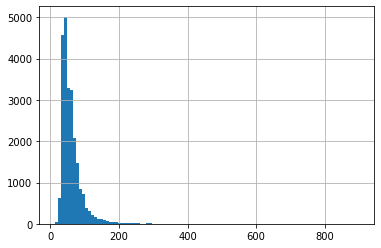

In [43]:
#Построим гистограмму для общей площади
df['total_area'].hist(bins=100)

<AxesSubplot:>

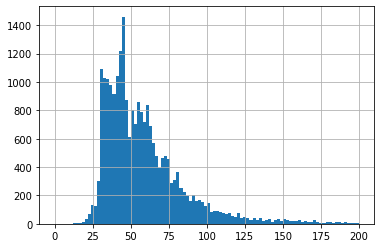

In [44]:
#Посмотрим первые 200 значений по оси y для более детальной картины
df['total_area'].hist(bins=100, range=(0, 200))

<AxesSubplot:>

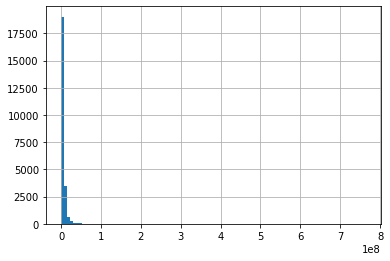

In [45]:
#Построим гистограмму для цены
df['last_price'].hist(bins=100)

<AxesSubplot:>

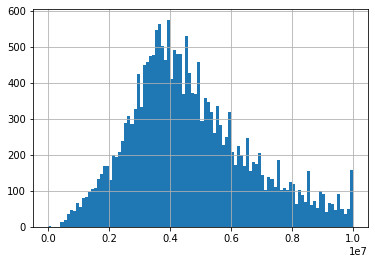

In [46]:
#Посмотрим первые 10000000 значений по оси y для более детальной картины
df['last_price'].hist(bins=100, range=(0, 10000000))

<AxesSubplot:>

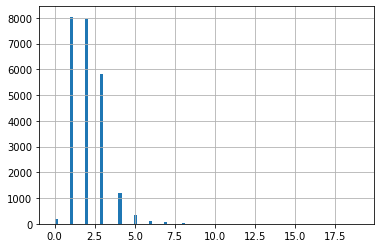

In [47]:
#Построим гистограмму для количества комнат
df['rooms'].hist(bins=100)

<AxesSubplot:>

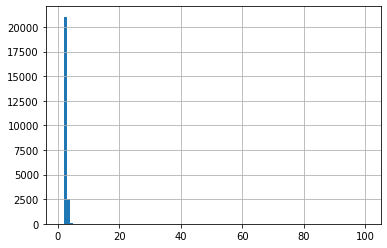

In [48]:
#Построим гистограмму для высоты потолков
df['ceiling_height'].hist(bins=100)

<AxesSubplot:>

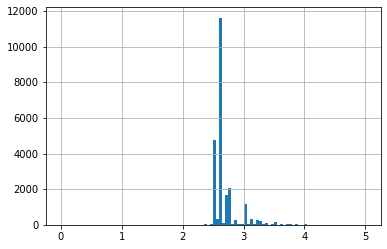

In [49]:
#Посмотрим первые 15 значений по оси y для более детальной картины
df['ceiling_height'].hist(bins=100, range=(0, 5))

### Вывод

Были изучены следующие параметры: площадь, цена, число комнат, высота потолков и построены гистограммы для каждого параметра. В целом они более-менее похожи либо на нормальное, либо на распределение Пуассона, но в некоторых есть непонятные значения, скорее всего это выбросы (например, число комнат = 0 или низкая высота потолка, как мы могли увидеть в Предобработке данных).

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

<AxesSubplot:>

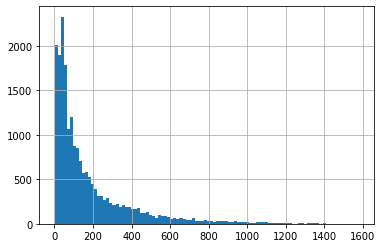

In [50]:
#Построим гистограмму для времени продажи квартиры
df['days_exposition'].hist(bins=100)

<AxesSubplot:>

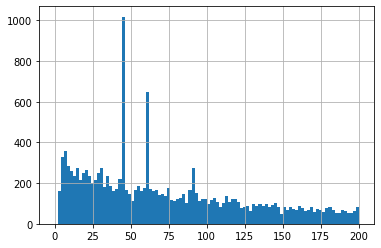

In [51]:
#Рассмотрим более подробно первые 200 значений на оси y
df['days_exposition'].hist(bins=100, range=(0, 200))

In [53]:
#Заменим все пустые значения в столбце 'days_exposition' на 0
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02b253b790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02b253be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02b253b430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02b2548550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02b25488b0>],
 'means': []}

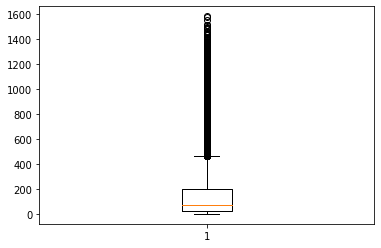

In [54]:
#Построим диаграмму размаха для определения быстрых и долгих продаж
plt.boxplot(df['days_exposition'])

In [55]:
#Рассмотрим значения более подробно
df['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [56]:
#Посмотрим самые выделяющиеся значения на гистограмме
df['days_exposition'].value_counts()

0       3181
45       880
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

### Вывод

Гистограмма по времени продажи показала, что есть выбиающиеся значения: 45, 60, 7, 30, 90. По сути - это все значения сроков публикации на Яндекс.Недвижимость (https://yandex.ru/support/realty/owner/home/add-ads-housing.html), но стоит это внимательно рассмотреть, поскольку некоторые помещения могли продаться именно в эти дни. Среднее значение продажи = 181 день, а медиана = 95 дней, что почти в 2 раза меньше. По диаграмме размаха можно сказать, что нормальным временем продажи квартиры является период с 1 по ~500 дней. Сама гистограмма похожа на распределение Пуассона.

Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

In [57]:
#Теперь выберем данные, в которых не будет выбивающихся значений, как в прошлой гистограмме и добавим к ним 0
#Используем функцию query()
good_data = df.query('days_exposition not in (0, 7, 30, 45, 60, 90)')

<AxesSubplot:>

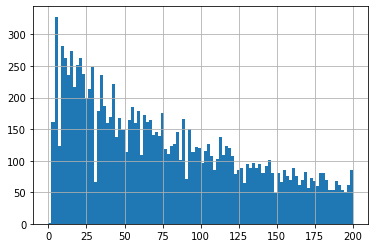

In [58]:
#Теперь построим 'отфильтрованную' гистограмму
good_data['days_exposition'].hist(bins=100, range=(0,200))             

In [59]:
#Проверим значения для 'отфильтрованных' данных
good_data['days_exposition'].value_counts()

4       176
3       158
5       152
14      148
9       143
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1136, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02b2336610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02b2336cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02b23362b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02b23433d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02b2343730>],
 'means': []}

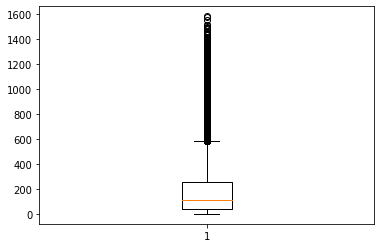

In [60]:
#Построим диаграмму рассеяния для 'отфильтрованных' данных
plt.boxplot(good_data['days_exposition'])

In [61]:
#Проверим теперь среднее значение и медиану
good_data['days_exposition'].describe()

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод

Был создан новый датафрейм, из которого убрались выбивающиеся значения  7, 30, 45, 60, 90 и 0. Теперь диаграмма похожа на распределения Пуассона. Теперь среднее = 196, медиана = 114 (такой разбор скорее всего из-за наличия некоторых крупных выбросов). С 'отфильтрованными' данными теперь нормально время продажи - от 1 до ~600 дней, остальные значения являются выбросами.

Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [62]:
#Найдём коэффициент корреляции общей площади к цене и округлим его до 2 знаков после запятой
round(df['total_area'].corr(df['last_price']), 2)

0.65

In [63]:
#Найдём коэффициент корреляции количества комнат к цене и округлим его до 2 знаков после запятой
round(df['rooms'].corr(df['last_price']), 2)

0.36

In [64]:
#Найдём коэффициент корреляции расстояния до центра к цене и округлим его до 2 знаков после запятой
round(df['cityCenters_nearest'].corr(df['last_price']), 2)

-0.21

,mean,median,count
,last_price,last_price,last_price
floor_category,,,
другой,6.675444e+06,4850000,17446
первый,4.803560e+06,3900000,2917
последний,7.361025e+06,4300000,3336


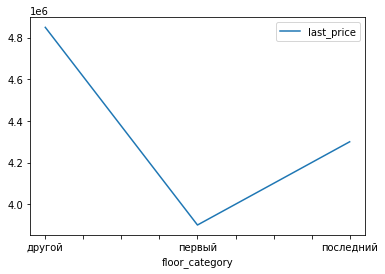

In [65]:
#Сделаем сводную таблицу и построим график зависимости цены от категории этажа
floor_pivot_table = df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median', 'count'])
floor_pivot_table.plot(y='median')
floor_pivot_table

In [66]:
#Ешё можно посмотреть коэффициент корреляции этажа от цены
round(df['floor'].corr(df['last_price']), 2)

0.03

,mean,median,count
,last_price,last_price,last_price
weekday,,,
0,6.511613e+06,4650000,3612
1,6.394233e+06,4730000,4183
2,6.627970e+06,4700000,3974
3,6.708663e+06,4650000,4295
4,6.372131e+06,4585000,4000
5,6.976804e+06,4555000,1936
6,6.246180e+06,4550000,1699


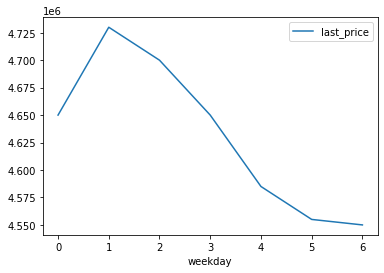

In [67]:
#Сделаем сводную таблицу и построим график зависимости цены от дня недели
weekday_pivot_table = df.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'median', 'count'])
weekday_pivot_table.plot(y='median')
weekday_pivot_table

,mean,median,count
,last_price,last_price,last_price
month,,,
1,6.668233e+06,4600000,1500
2,6.468500e+06,4650000,2640
3,6.359275e+06,4650000,2587
4,6.737198e+06,4800000,2379
5,6.600435e+06,4515000,1274
6,6.310269e+06,4400000,1760
7,6.649337e+06,4650000,1695
8,6.350233e+06,4570000,1744


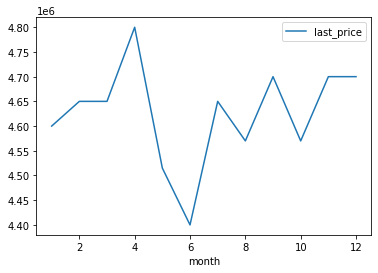

In [68]:
#Сделаем сводную таблицу и построим график зависимости цены от месяца
month_pivot_table = df.pivot_table(index='month', values='last_price', aggfunc=['mean', 'median', 'count'])
month_pivot_table.plot(y='median')
month_pivot_table

,mean,median,count
,last_price,last_price,last_price
year,,,
2014,1.208714e+07,7700000,137
2015,8.572833e+06,5350000,1191
2016,6.827912e+06,4550000,2783
2017,6.585729e+06,4500000,8190
2018,5.950966e+06,4550000,8519
2019,6.782388e+06,5050000,2879


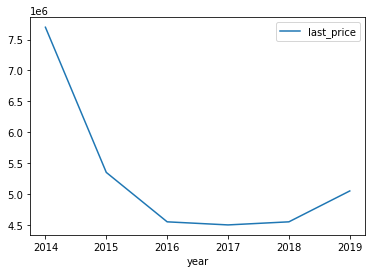

In [69]:
#Сделаем сводную таблицу и построим график зависимости цены от года
year_pivot_table = df.pivot_table(index='year', values='last_price', aggfunc=['mean', 'median', 'count'])
year_pivot_table.plot(y='median')
year_pivot_table

### Вывод

- коэффициент корреляции общей площади к цене = 0.65, это говорит о том, что есть зависимость площади от цены (чем больше площадь, тем больше цена), но не настолько сильная, поскольку могут быть другие факторы (например, территория, на которой расположен участок);
- коэффициент корреляции количества комнат к цене = 0.36, это говорит о том, что есть не очень большая зависимость (скорее всего, есть другие факторы, например общая площадь);
- коэффициент корреляции расстояния до центра к цене = -0.21, это говорит о том, что зависимости между этими 2 параметрами почти нет (скорее всего, есть другие факторы);
- зависимость категории этажа от цены достаточно сложно понять по графику, там другие факторы (например, территория или максимальное количество этажей), при этом коэффициент корреляции этажа = 0.03, что говорит почти о полном отсутствии зависимости;
- зависимость дня недели от цены показывает, что наиболее дорогие продажи были сделаны во вторник, низкие - выходные;
- зависимость месяца от цены показывает, что наиболее дорогие продажи были сделаны в 4, 7, 9 месяцах, низкие - 1, 6, 8, 10;
- зависимость цены от года показывает, что наиболее дорогие продажи были сделаны в 2014 году, в остальных годах убывает, но с 2017 по 2019 года был небольшой рост;

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [70]:
#Выберем первые 10 населённых пунктов с наибольшим числом объявлений
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [71]:
#Для них с помощью сводной таблицы посчитаем медианную цену квадратного метра в этих населённых пунктах
locality_name_pivot_table = df.pivot_table(index='locality_name', values='price_per_square_meter', 
                                           aggfunc=['count','median'])
locality_name_pivot_table.columns = ['count', 'median']
locality_name_pivot_table.sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15721,104761.0
посёлок Мурино,522,85878.0
посёлок Шушары,440,76876.0
Всеволожск,398,65789.0
Пушкин,369,100000.0
Колпино,338,74723.5
посёлок Парголово,327,91642.0
Гатчина,307,67796.0
деревня Кудрово,299,91860.0


In [72]:
#Выберем населённые пункты с самой высокой стоимостью жилья
locality_name_price_pivot_table = df.pivot_table(index='locality_name', values='last_price', 
                                           aggfunc=['count','median'])
locality_name_price_pivot_table.columns = ['count', 'median']
locality_name_price_pivot_table.sort_values(by='median', ascending=False).head(10)

,count,median
locality_name,,
деревня Хязельки,1,11000000.0
деревня Бор,2,10397600.0
посёлок Александровская,2,8725000.0
посёлок Репино,4,8083708.0
Санкт-Петербург,15721,5500000.0
Сестрорецк,183,5450000.0
Пушкин,369,5180000.0
посёлок Лисий Нос,2,5027500.0
деревня Глинка,2,4750000.0


In [73]:
#С самой низкой стоимостью жилья
locality_name_price_pivot_table.sort_values(by='median').head(10)

,count,median
locality_name,,
деревня Вахнова Кара,1,450000.0
деревня Старополье,3,450000.0
деревня Чудской Бор,1,500000.0
поселок Совхозный,2,517500.0
посёлок станции Свирь,2,575000.0
деревня Выскатка,2,585000.0
деревня Ям-Тесово,2,625000.0
поселок Цвылёво,1,650000.0
деревня Коркино,2,650000.0


### Вывод

Были выбраны первые 10 населённых пунктов с наибольшим количество объявлений, для них были выведены медианные значения цены квадратного метра. Для 10 территорий были посчитаны медианные значения самых высоких стоимостей жилья и самых низких. Скорее всего, некоторые значения являются неккоректными, поскольку их мало в плане количества, либо это большие дома/особняки (для высоких цен), или маленькие дома в деревнях (для низких цен).

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [74]:
#Создадим в датафрейме новый столбец с расстоянием до центра в километрах
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000, 0)

,last_price
cityCenters_nearest_km,
0.0,17900000
1.0,11395000
2.0,10000000
3.0,8409000
4.0,9200000
5.0,9500000
6.0,8900000
7.0,7800000
8.0,7450000


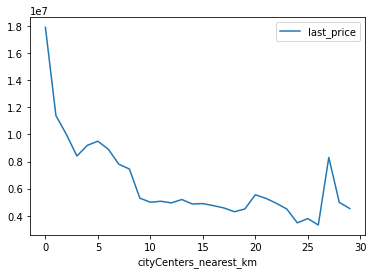

In [75]:
#Создадим сводную таблицу (Санкт-Петербург выберем с помощью query()), построим график и выведем значения километров с 
#медианным значением цены
spb_distance_pivot_table = df.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km',
                                                                     values='last_price', aggfunc='median')
spb_distance_pivot_table.plot()
spb_distance_pivot_table

### Вывод

Был построен график зависимости цены от расстояния до центра в километрах для Санкт-Петербурга. Центральная зона находится в диапазоне от 0 до 3 км.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

In [76]:
#Создадим 'отфильтрованный' датафрейм для квартир в центре Санкт-Петербурга
spb_center = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 3')

In [77]:
#Найдём коэффициент корреляции количества комнат от цены в центре Санкт-Петербурга
round(spb_center['rooms'].corr(spb_center['last_price']), 2)

0.24

In [78]:
#Найдём коэффициент корреляции общей площади от цены в центре Санкт-Петербурга
round(spb_center['total_area'].corr(spb_center['last_price']), 2)

0.57

In [79]:
#Найдём коэффициент корреляции высоты потолка от цены в центре Санкт-Петербурга
round(spb_center['ceiling_height'].corr(spb_center['last_price']), 2)

0.03

In [80]:
#Найдём коэффициент корреляции цены квадратного метра от всей цены в центре Санкт-Петербурга
round(spb_center['price_per_square_meter'].corr(spb_center['last_price']), 2)

0.83

<AxesSubplot:xlabel='rooms'>

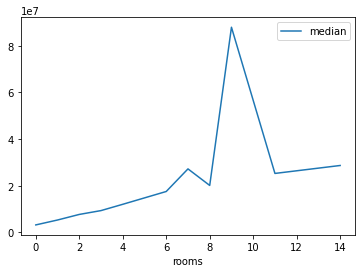

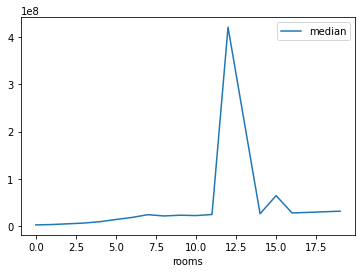

In [81]:
#Создадим сводные таблицы зависимости цены от количества комнат для 'отфильтрованных' данных центра Санкт-Петербурга и 
#сравним их со всеми данными Санкт-Петербурга и построим графики
spb_center_rooms_pivot_table = spb_center.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])

spb_center_rooms_pivot_table.columns = ['count', 'median']

spb_center_rooms_pivot_table_all = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='rooms', values='last_price', aggfunc=['count', 'median'])

spb_center_rooms_pivot_table_all.columns = ['count', 'median']

spb_center_rooms_pivot_table.plot(y='median')
spb_center_rooms_pivot_table_all.plot(y='median')

<AxesSubplot:xlabel='floor_category'>

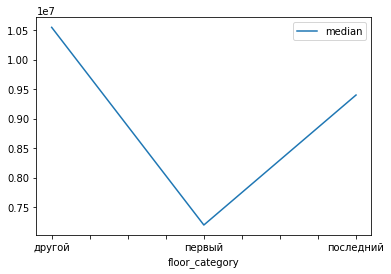

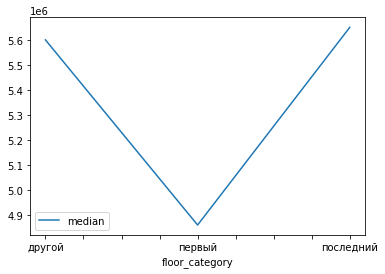

In [82]:
#Создадим сводные таблицы зависимости цены от категории этажа для 'отфильтрованных' данных центра Санкт-Петербурга и 
#сравним их со всеми данными Санкт-Петербурга и построим графики
spb_center_floor_pivot_table = spb_center.pivot_table(index='floor_category', values='last_price', 
                                                      aggfunc=['count', 'median'])

spb_center_floor_pivot_table.columns = ['count', 'median']

spb_center_floor_pivot_table_all = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='floor_category', values='last_price', aggfunc=['count', 'median'])

spb_center_floor_pivot_table_all.columns = ['count', 'median']

spb_center_floor_pivot_table.plot(y='median')
spb_center_floor_pivot_table_all.plot(y='median')

<AxesSubplot:xlabel='cityCenters_nearest_km'>

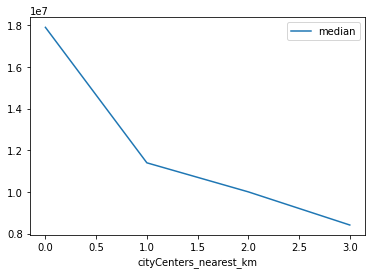

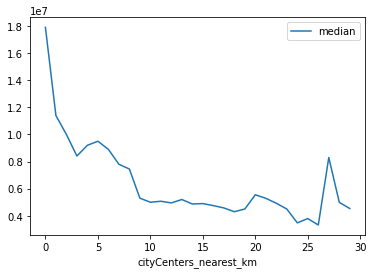

In [83]:
#Создадим сводные таблицы зависимости цены от расстояния до центра для 'отфильтрованных' данных центра Санкт-Петербурга и 
#сравним их со всеми данными Санкт-Петербурга и построим графики
spb_center_distance_pivot_table = spb_center.pivot_table(index='cityCenters_nearest_km', values='last_price', 
                                                         aggfunc=['count', 'median'])
spb_center_distance_pivot_table.columns = ['count', 'median']

spb_center_distance_pivot_table_all = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='cityCenters_nearest_km', values='last_price', aggfunc=['count', 'median'])

spb_center_distance_pivot_table_all.columns = ['count', 'median']

spb_center_distance_pivot_table.plot(y='median')
spb_center_distance_pivot_table_all.plot(y='median')

<AxesSubplot:xlabel='year'>

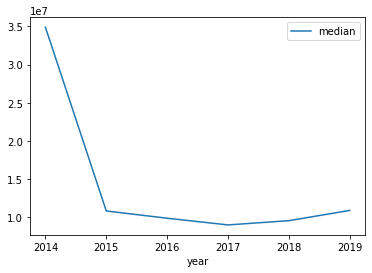

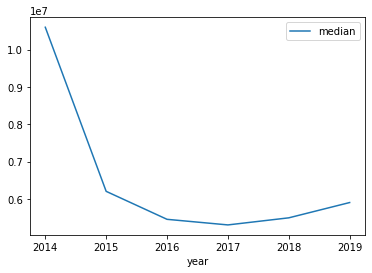

In [84]:
#Создадим сводные таблицы зависимости цены от года для 'отфильтрованных' данных центра Санкт-Петербурга и 
#сравним их со всеми данными Санкт-Петербурга и построим графики
spb_center_exposition_pivot_table = spb_center.pivot_table(index='year', values='last_price', 
                                                           aggfunc=['count', 'median'])

spb_center_exposition_pivot_table.columns = ['count', 'median']

spb_center_exposition_pivot_table_all = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='year', values='last_price', aggfunc=['count', 'median'])

spb_center_exposition_pivot_table_all.columns = ['count', 'median']

spb_center_exposition_pivot_table.plot(y='median')
spb_center_exposition_pivot_table_all.plot(y='median')

### Вывод

- коэффициент корреляции количества комнат от цены в центре Санкт-Петербурга = 0.24, что говорит о слабой зависимости между этими значениями (скорее всего, есть другие факторы);
- коэффициент корреляции общей площади от цены в центре Санкт-Петербурга = 0.57, что говорит о небольшой зависимости между этими значениями (скорее всего, есть другие факторы);
- коэффициент корреляции общей площади от цены в центре Санкт-Петербурга = 0.03, что говорит о полном отсутствии зависимости между этими значениями (есть другие факторы);
- коэффициент корреляции цены квадратного метра от всей цены в центре Санкт-Петербурга = 0.83, что говорит об очень сильной зависимости между этими значениями (что логично);
- зависимости цены от количества комнат для 'отфильтрованных' данных центра Санкт-Петербурга и всеми данными Санкт-Петербурга показывает, что самые дорогие помещения с комнатами - 9 и 12 соответственно (что может быть странно, поскольку это слишком много комнат и может быть вброс данных);
- зависимости цены от категории этажей для 'отфильтрованных' данных центра Санкт-Петербурга и всеми данными Санкт-Петербурга мало что показывает, скорее всего какой-то зависимости тут нет (возможно, нужно посмотреть по другим параметрам);
- зависимости цены от расстояния до центра для 'отфильтрованных' данных центра Санкт-Петербурга и всеми данными Санкт-Петербурга мало что показывает, поскольку второй вариант более расширенный, а первый более подробный;
- зависимости цены от даты для 'отфильтрованных' данных центра Санкт-Петербурга и всеми данными Санкт-Петербурга имеют похожие графики, только в первом случае имеется резкий переход с 2015 по 2017 года, а во втором - более плавный для тех же периодов;

## Общий вывод

Были изучены и проанализированы данные по Яндекс.Недвижимости. Были заполнены пропуски и изменены типы данных там, где это возможно. Были посчитаны дополнительные параметры для дальнейшей их обработки (в виде коэффициентов корреляции или графиков). Были отфильтрованы данные, убраны выбирающиеся значения. Для корреляции и графиков нельзя всё сказать однозначно, они зависят от многоих параметров, поскольку были взяты средние или медианные значения и они не могут показать всю картину в целом. Также есть данные, по которым трудно сказать, выброс это или действительно такое значение. Был выявлен центр в Санкт-Петербурге, который расположен в радиусе 3км. Более подробные выводы находятся в шагах.